In [10]:
#%pip install ydata-profiling
#%pip install ipywidgets
#%pip install scikit-learn


In [11]:
import pandas as pd
from ydata_profiling import ProfileReport

data = pd.read_csv("C:\\Users\merah\Documents\GitHub\CIND820\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")
print(data.head())
print(data.info())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   (0-10)      ?   
1        149190     55629189        Caucasian  Female  (10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  (20-30)      ?   
3        500364     82442376        Caucasian    Male  (30-40)      ?   
4         16680     42519267        Caucasian    Male  (40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [12]:
profile = ProfileReport(data, title="Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#print to html

profile.to_file("Nesrine Imene Merah - Initial Profiling Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:

# Change certain columns to categorical 
categorical_columns = ['medical_specialty','encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'readmitted']
data[categorical_columns] = data[categorical_columns].astype("category")

# Keep only the first encounter for each patient
data = data.groupby('patient_nbr').head(1)

print(data.dtypes)

# Drop columns with too many missing values
data.drop(columns=['weight','payer_code'], inplace=True)


encounter_id                category
patient_nbr                 category
race                        category
gender                      category
age                         category
weight                        object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                    object
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                     object
repaglinide                   object
nateglinide                   object
c

C:\Users\merah\AppData\Local\Temp\ipykernel_2764\1555566154.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = data.groupby('patient_nbr').head(1)
C:\Users\merah\AppData\Local\Temp\ipykernel_2764\1555566154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['weight','payer_code'], inplace=True)


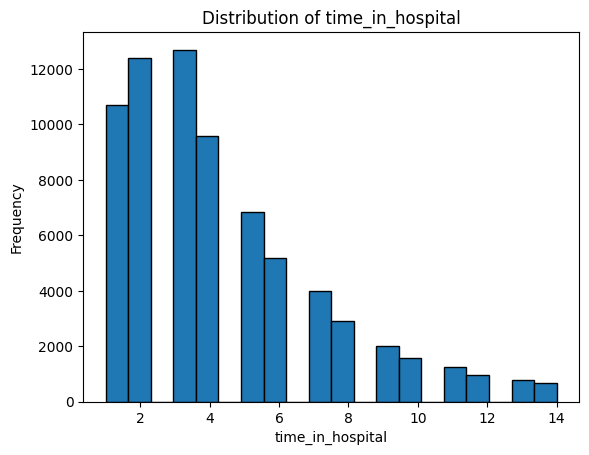

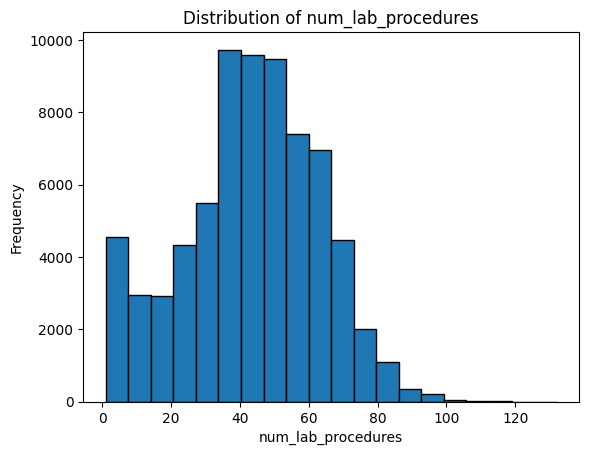

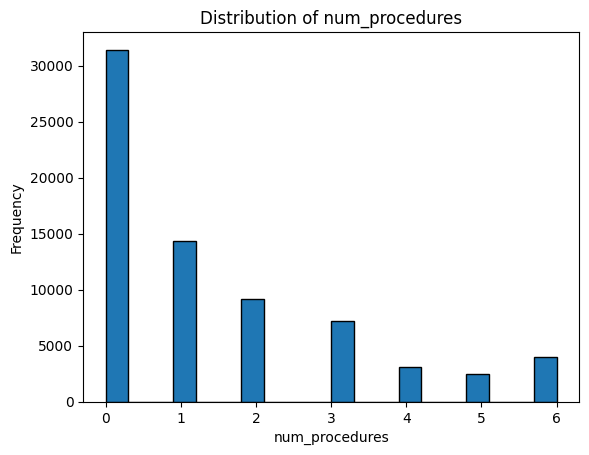

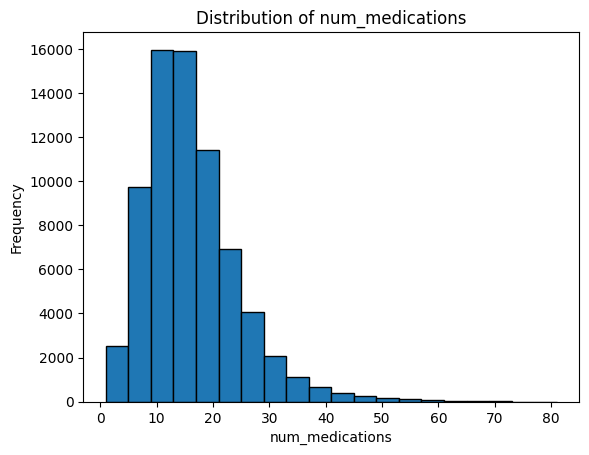

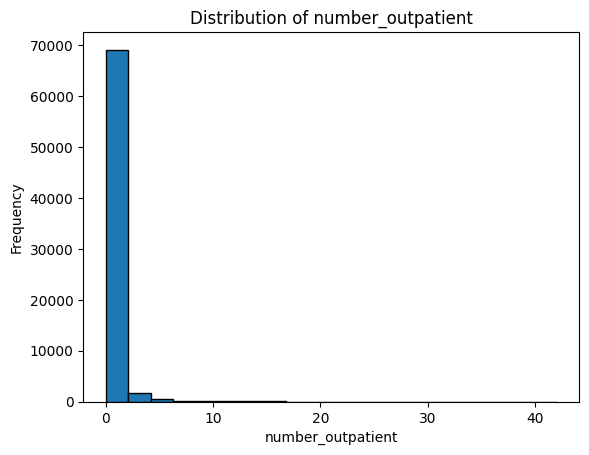

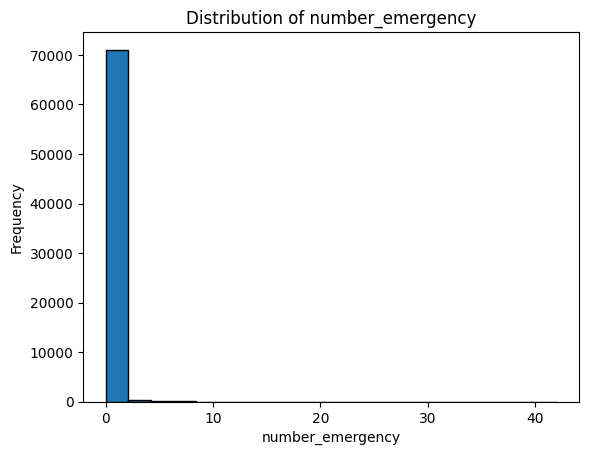

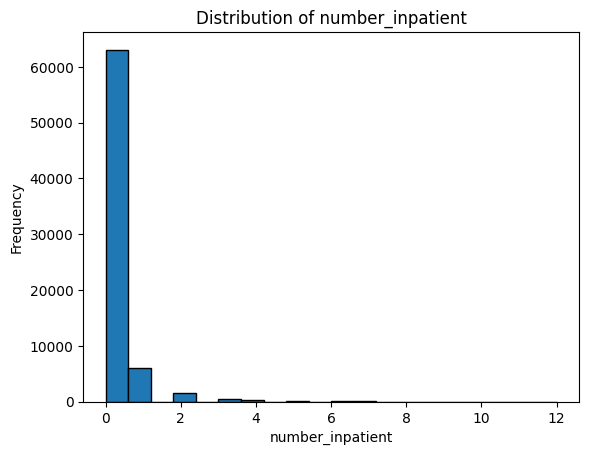

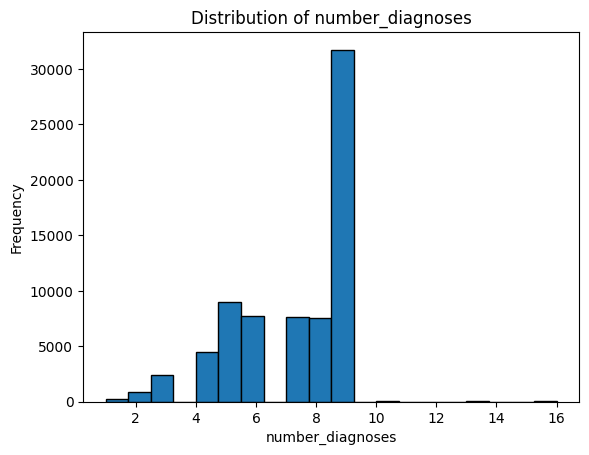

In [14]:
# Univariate analysis
# Distribution of numerical features
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')

numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.hist(data[col].dropna(), bins=20, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



readmitted        <30    >30     NO
gender                             
Female           3370  12094  22561
Male             2923  10146  20421
Unknown/Invalid     0      0      3


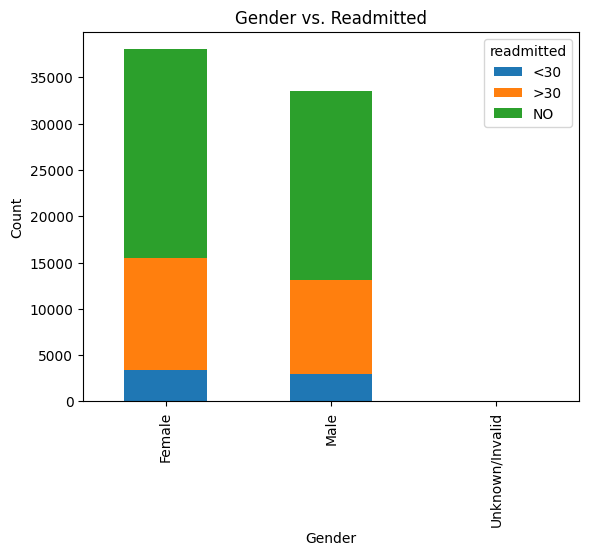

In [15]:
#bivariate analaysis
# Gender vs. Readmitted
readmitted_by_gender = pd.crosstab(data['gender'], data['readmitted'])
print(readmitted_by_gender)

# Stacked bar plot
readmitted_by_gender.plot(kind='bar', stacked=True)
plt.title('Gender vs. Readmitted')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Unable to determine who is more likely to be readmitted based on gender


readmitted                            <30        >30          NO
gender          gender                                          
Female          Female           8.862590  31.805391   59.332018
Male            Male             8.727979  30.295611   60.976411
Unknown/Invalid Unknown/Invalid  0.000000   0.000000  100.000000

C:\Users\merah\AppData\Local\Temp\ipykernel_2764\4088968034.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['gender', 'readmitted']).size()  # Count occurrences of each combination
C:\Users\merah\AppData\Local\Temp\ipykernel_2764\4088968034.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['gender', 'readmitted']).size()  # Count occurrences of each combination


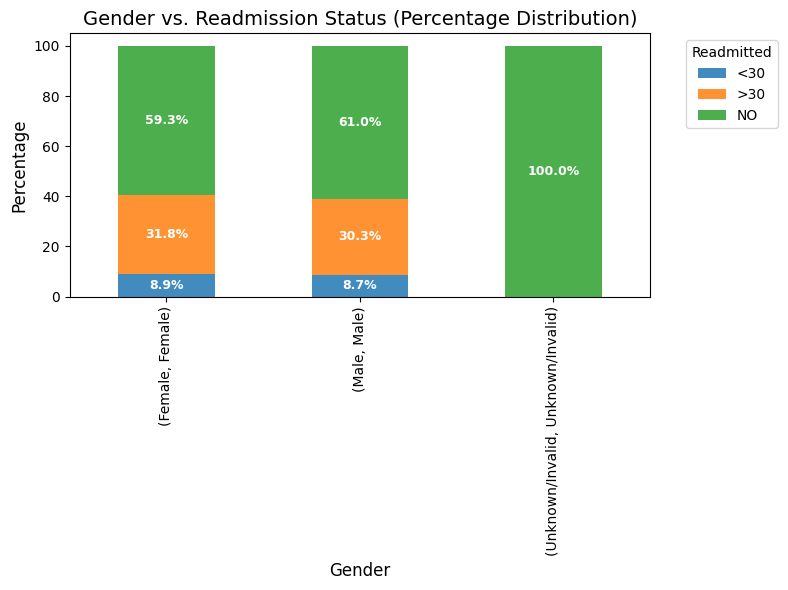

Chi-Square Statistic: 23.421888511205065
P-Value: 0.0001042747953143715
The difference in readmission rates between males and females is statistically significant.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import chi2_contingency
#matplotlib.use('TkAgg')

# Calculate the percentages of readmission statuses within each gender
gender_readmitted_percentage = (
    data.groupby(['gender', 'readmitted']).size()  # Count occurrences of each combination
    .groupby(level=0)  # Group by 'gender'
    .apply(lambda x: 100 * x / x.sum())  # Convert counts to percentages
    .unstack()  # Reshape for a cleaner view
)

# Display the result
print(gender_readmitted_percentage)
# Plot the stacked bar chart with percentages labeled
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
bars = gender_readmitted_percentage.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
    alpha=0.85
)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:  # Avoid placing labels on empty bars
            percentage = f"{bar.get_height():.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of bar
                bar.get_y() + bar.get_height() / 2,  # Middle of bar
                percentage,
                ha="center",
                va="center",
                fontsize=9,
                color="white",
                weight="bold"
            )

# Formatting the plot
ax.set_title('Gender vs. Readmission Status (Percentage Distribution)', fontsize=14)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Statistical test necessary? Yes, to determine if the difference in readmission rates between males and females is statistically significant.
# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['readmitted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Determine if the result is statistically significant
alpha = 0.05
if p < alpha:
    print("The difference in readmission rates between males and females is statistically significant.")
else:
    print("The difference in readmission rates between males and females is not statistically significant.")


readmitted        <30    >30     NO
race                               
?                 141    435   1372
AfricanAmerican  1093   3870   7924
Asian              41    107    349
Caucasian        4816  17104  31571
Hispanic          122    413    982
Other              80    311    787


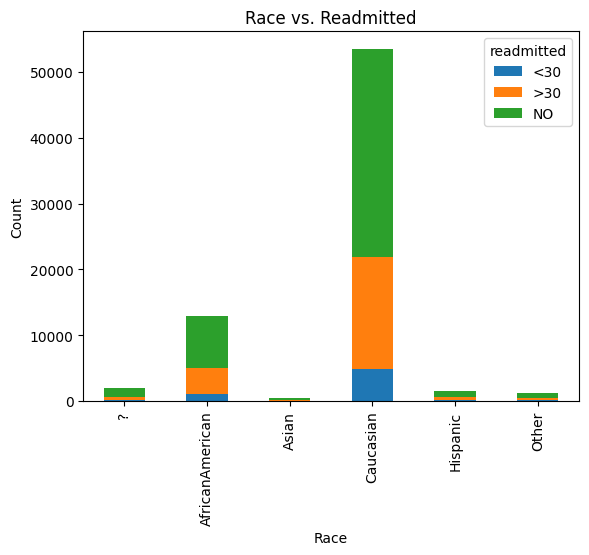

readmitted                            <30        >30         NO
race            race                                           
?               ?                7.238193  22.330595  70.431211
AfricanAmerican AfricanAmerican  8.481415  30.030263  61.488322
Asian           Asian            8.249497  21.529175  70.221328
Caucasian       Caucasian        9.003384  31.975473  59.021144
Hispanic        Hispanic         8.042189  27.224786  64.733026
Other           Other            6.791171  26.400679  66.808149


C:\Users\merah\AppData\Local\Temp\ipykernel_2764\2848645523.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['race', 'readmitted']).size()  # Count occurrences of each combination
C:\Users\merah\AppData\Local\Temp\ipykernel_2764\2848645523.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['race', 'readmitted']).size()  # Count occurrences of each combination


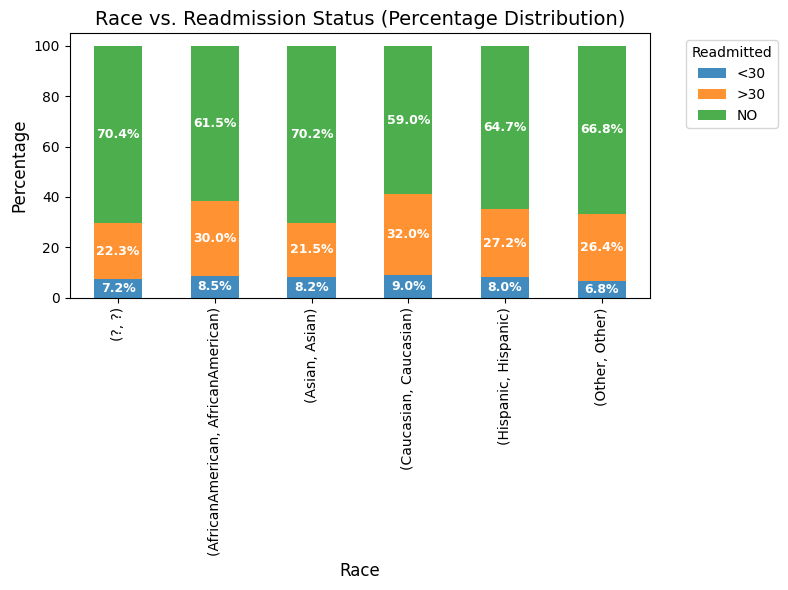

In [17]:

# Count Race vs. Readmitted
readmitted_by_race = pd.crosstab(data['race'], data['readmitted'])
print(readmitted_by_race)

# Stacked bar plot
readmitted_by_race.plot(kind='bar', stacked=True)
plt.title('Race vs. Readmitted')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Percentages Race vs. Readmitted
# Calculate the percentages of readmission statuses within each gender
race_readmitted_percentage = (
    data.groupby(['race', 'readmitted']).size()  # Count occurrences of each combination
    .groupby(level=0)  # Group by 'race'
    .apply(lambda x: 100 * x / x.sum())  # Convert counts to percentages
    .unstack()  # Reshape for a cleaner view
)

# Display the result
print(race_readmitted_percentage)
# Plot the stacked bar chart with percentages labeled
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
bars = race_readmitted_percentage.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
    alpha=0.85
)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:  # Avoid placing labels on empty bars
            percentage = f"{bar.get_height():.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of bar
                bar.get_y() + bar.get_height() / 2,  # Middle of bar
                percentage,
                ha="center",
                va="center",
                fontsize=9,
                color="white",
                weight="bold"
            )

# Formatting the plot
ax.set_title('Race vs. Readmission Status (Percentage Distribution)', fontsize=14)
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

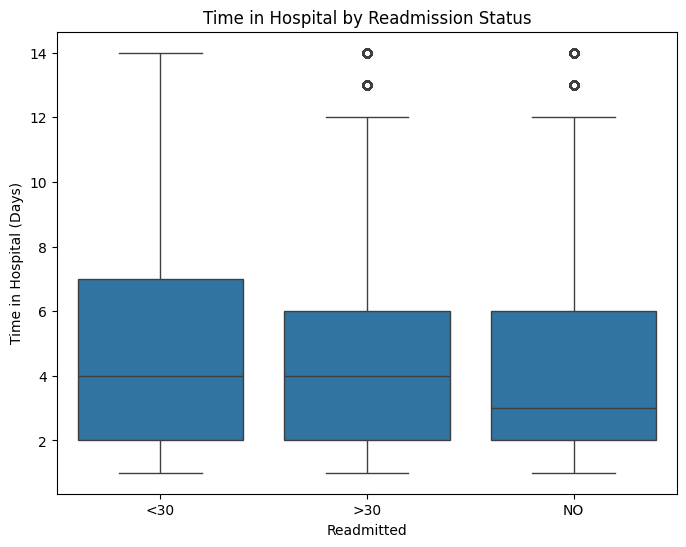

In [18]:
#time in hospital by readmitted
import seaborn as sns
# Numerical vs. Categorical: Time in Hospital by Readmitted
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='readmitted', y='time_in_hospital')
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (Days)')
plt.show()

#time in the hospital is similar between readmitted and not readmitted patients

readmitted  <30  >30  NO
diag_1                  
10            0    0   1
11            0    2   6
110           0    1   1
112          11   13  24
114           0    1   0
...         ...  ...  ..
V63           1    1   5
V66           0    0   1
V67           0    1   0
V70           0    0   1
V71           0    1   7

[697 rows x 3 columns]


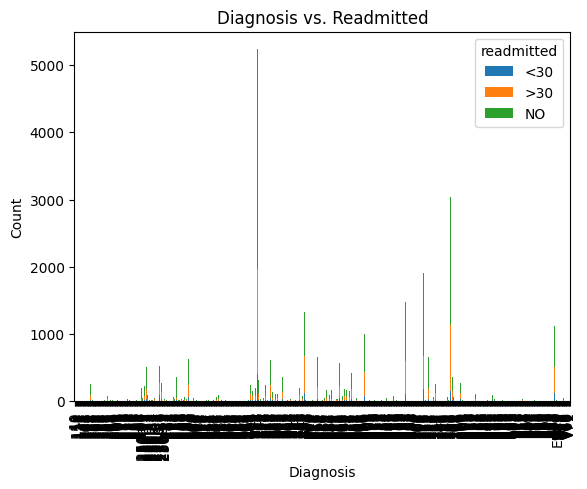

In [ ]:
# Cross-tabulation of categorical variables
readmitted_by_diagnosis = pd.crosstab(data['diag_1'], data['readmitted'])
print(readmitted_by_diagnosis)

# Stacked bar plot
readmitted_by_diagnosis.plot(kind='bar', stacked=True)
plt.title('Diagnosis vs. Readmitted')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# too many diagnosis codes to make sense of the data. create a new column to group the diagnosis codes

In [20]:
#create new column to group diagnosis codes
def group_diagnosis(icd_code):
    try:
        code = float(icd_code)  # Convert to float
    except ValueError:  # Handle non-numeric values
        return "Unknown"

    if 1 <= code <= 139:
        return "Infectious and Parasitic"
    elif 140 <= code <= 239:
        return "Neoplasms"
    elif 240 <= code <= 279:
        return "Endocrine and Metabolic"
    elif 280 <= code <= 289:
        return "Blood Diseases"
    elif 390 <= code <= 459:
        return "Circulatory System"
    elif 460 <= code <= 519:
        return "Respiratory System"
    elif 520 <= code <= 579:
        return 'Digestive System'
    elif 580 <= code <= 629:
        return 'Genitourinary System'
    elif 630 <= code <= 679:
        return 'Comp. of Pregnancy'
    elif 680 <= code <= 709:
        return 'Skin and Subcutaneous Tissue'
    elif 710 <= code <= 739:
        return 'Musculoskeletal System'
    elif 740 <= code <= 759:
        return 'Congenital Anomalies'
    elif 760 <= code <= 779:
        return 'Perinatal Disease'
    elif 780 <= code <= 799:
        return 'Ill-Defined Conditions'
    elif 800 <= code <= 999:
        return 'Injury and Poisoning'
    else:
        return "Other"

# Apply the function
data['diagnosis_group'] = data['diag_1'].apply(group_diagnosis)



C:\Users\merah\AppData\Local\Temp\ipykernel_2764\3741194606.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diagnosis_group'] = data['diag_1'].apply(group_diagnosis)


C:\Users\merah\AppData\Local\Temp\ipykernel_2764\2282558840.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby(['diagnosis_group', 'readmitted']).size()  # Count occurrences of each combination


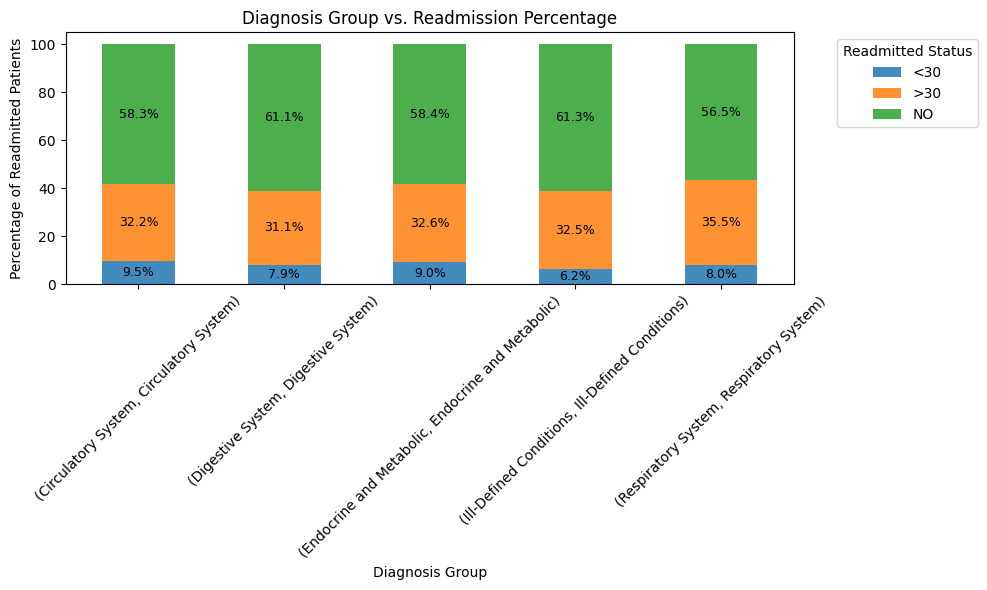

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of readmissions by diagnosis group
readmitted_by_diagnosis = pd.crosstab(data['diagnosis_group'], data['readmitted'])

# Select the top 5 diagnosis groups based on total counts
top_5_diagnoses = readmitted_by_diagnosis.sum(axis=1).nlargest(5).index
filtered_data = data[data['diagnosis_group'].isin(top_5_diagnoses)]

# Calculate the percentages of readmission statuses within each diagnosis group
Diagnosis_readmitted_percentage = (
    filtered_data.groupby(['diagnosis_group', 'readmitted']).size()  # Count occurrences of each combination
    .groupby(level=0)  # Group by 'diagnosis_group'
    .apply(lambda x: 100 * x / x.sum())  # Convert counts to percentages
    .unstack()  # Reshape for a cleaner view
)

# Plot the stacked bar chart with percentages labeled
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bars = Diagnosis_readmitted_percentage.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
    alpha=0.85
)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:  
            percentage = f"{bar.get_height():.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2,  
                percentage,
                ha="center",
                va="center",
                fontsize=9,
                color="black",
            )

# Customize the chart
plt.title('Diagnosis Group vs. Readmission Percentage')
plt.xlabel('Diagnosis Group')
plt.ylabel('Percentage of Readmitted Patients')
plt.xticks(rotation=45)
plt.legend(title="Readmitted Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


C:\Users\merah\AppData\Local\Temp\ipykernel_2764\465004724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diagnosis_group2'] = data['diag_2'].apply(group_diagnosis)
C:\Users\merah\AppData\Local\Temp\ipykernel_2764\465004724.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['diagnosis_group2', 'readmitted']).size()  # Count occurrences of each combination


readmitted                                                       <30  \
diagnosis_group2             diagnosis_group2                          
Blood Diseases               Blood Diseases                 8.681214   
Circulatory System           Circulatory System             9.060614   
Comp. of Pregnancy           Comp. of Pregnancy             3.399433   
Congenital Anomalies         Congenital Anomalies           7.228916   
Digestive System             Digestive System               8.236575   
Endocrine and Metabolic      Endocrine and Metabolic        8.299961   
Genitourinary System         Genitourinary System           8.783784   
Ill-Defined Conditions       Ill-Defined Conditions         8.494922   
Infectious and Parasitic     Infectious and Parasitic       9.104938   
Injury and Poisoning         Injury and Poisoning           9.741658   
Musculoskeletal System       Musculoskeletal System         7.864302   
Neoplasms                    Neoplasms                     11.82

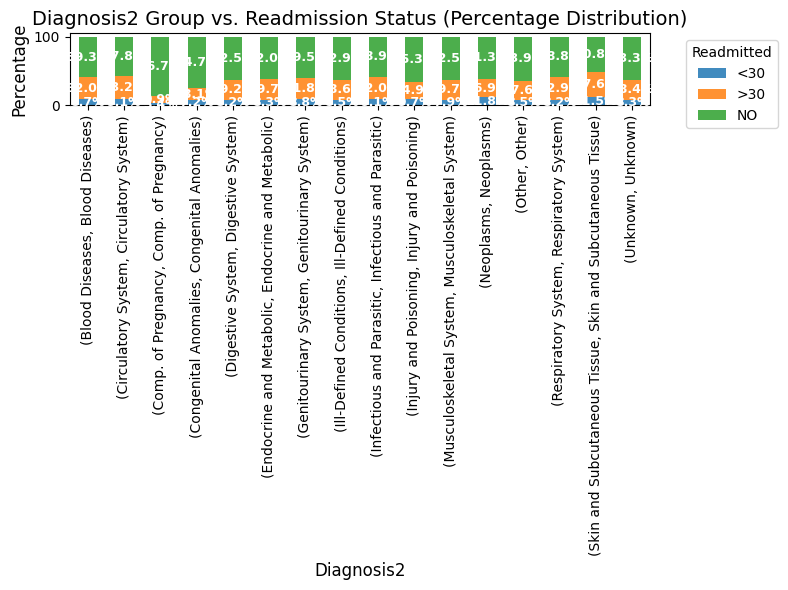

In [22]:

#same analysis for diagnosis 2
# Apply the function
data['diagnosis_group2'] = data['diag_2'].apply(group_diagnosis)

# Calculate the percentages of readmission statuses within each gender
Diagnosis2_readmitted_percentage = (
    data.groupby(['diagnosis_group2', 'readmitted']).size()  # Count occurrences of each combination
    .groupby(level=0)  
    .apply(lambda x: 100 * x / x.sum())  # Convert counts to percentages
    .unstack()  # Reshape for a cleaner view
)

# Display the result
print(Diagnosis2_readmitted_percentage)
# Plot the stacked bar chart with percentages labeled
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
bars = Diagnosis2_readmitted_percentage.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=["#1f77b4", "#ff7f0e", "#2ca02c"],
    alpha=0.85
)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:  # Avoid placing labels on empty bars
            percentage = f"{bar.get_height():.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of bar
                bar.get_y() + bar.get_height() / 2,  # Middle of bar
                percentage,
                ha="center",
                va="center",
                fontsize=9,
                color="white",
                weight="bold"
            )

# Formatting the plot
ax.set_title('Diagnosis2 Group vs. Readmission Status (Percentage Distribution)', fontsize=14)
ax.set_xlabel('Diagnosis2', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



readmitted  <30   >30    NO
A1Cresult                  
Norm        324  1041  2426
over7       246   862  1783
over8       510  1960  3834


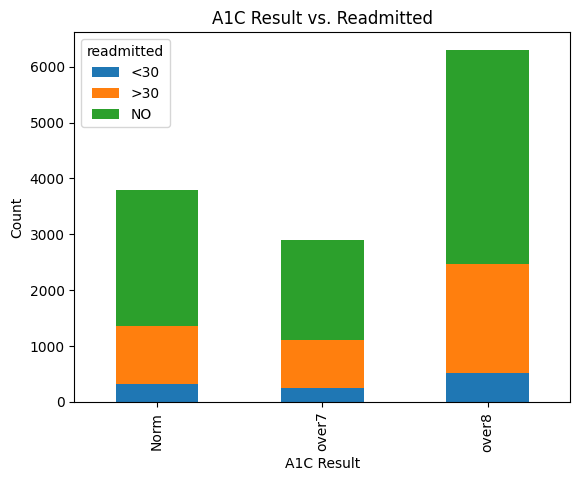

In [23]:

#H1C result Count 

# Cross-tabulation of categorical variables 
readmitted_by_A1Cresult = pd.crosstab(data['A1Cresult'], data['readmitted'])
print(readmitted_by_A1Cresult)

# Stacked bar plot
readmitted_by_A1Cresult.plot(kind='bar', stacked=True)
plt.title('A1C Result vs. Readmitted')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.show()

readmitted       <30        >30         NO
A1Cresult                                 
Norm        8.546558  27.459773  63.993669
over7       8.509166  29.816672  61.674161
over8       8.090102  31.091371  60.818528


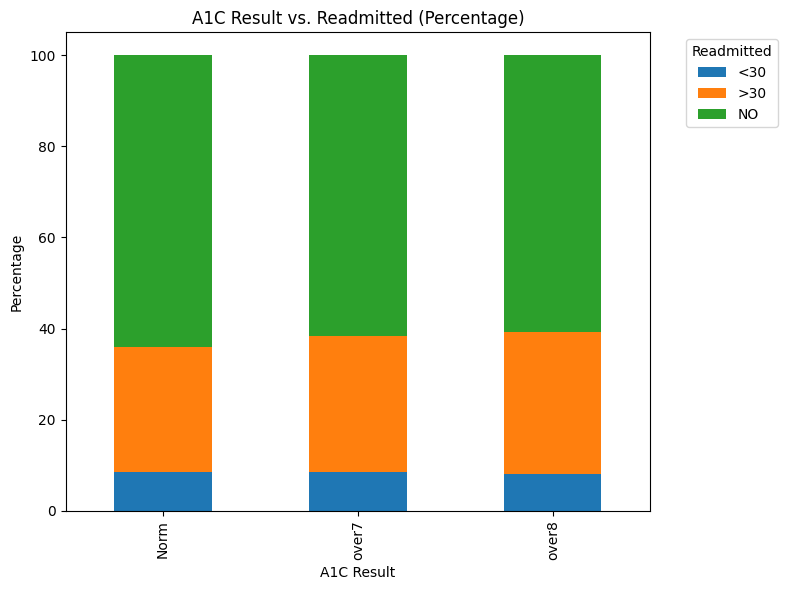

In [24]:
#H1C result percentage

readmitted_by_A1Cresult = pd.crosstab(data['A1Cresult'], data['readmitted'])

# Calculate percentages within each A1C result category
readmitted_by_A1Cresult_percentage = readmitted_by_A1Cresult.div(readmitted_by_A1Cresult.sum(axis=1), axis=0) * 100

# Display the percentages for reference
print(readmitted_by_A1Cresult_percentage)

# Stacked bar plot with percentages
readmitted_by_A1Cresult_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('A1C Result vs. Readmitted (Percentage)')
plt.xlabel('A1C Result')
plt.ylabel('Percentage')
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

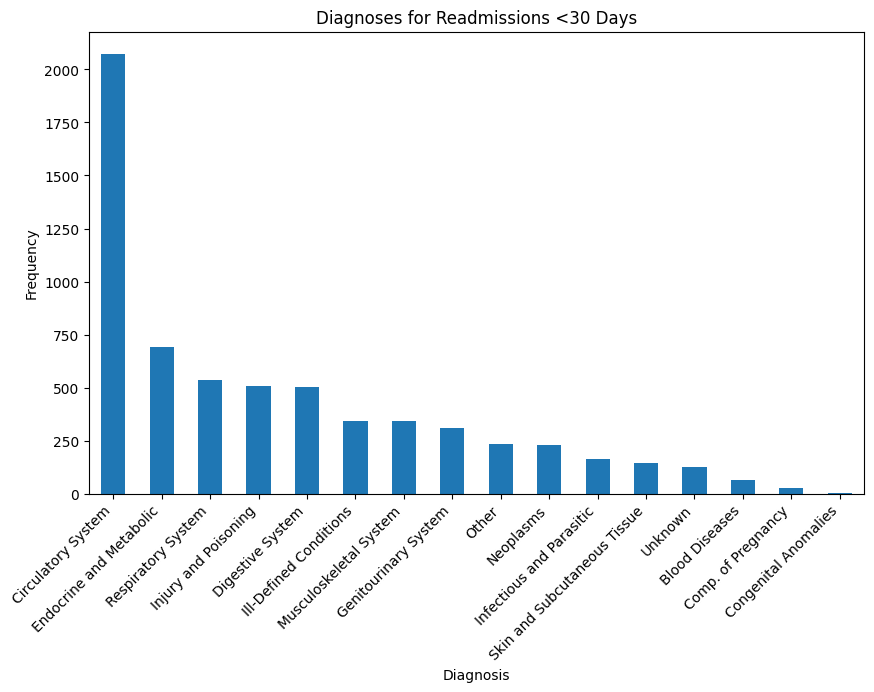

In [25]:
import matplotlib.pyplot as plt

# Filter data for readmissions less than 30 days
filtered_data = data[data['readmitted'] == '<30']  # Assuming '<30' indicates readmission <30 days

# Count occurrences of each diagnosis
diagnosis_counts = filtered_data['diagnosis_group'].value_counts()

# Plot a bar chart
diagnosis_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Diagnoses for Readmissions <30 Days')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Drop columns with mostly missing values or not relevant for analysis
data_cleaned = data.drop(columns=['encounter_id', 'patient_nbr', 'medical_specialty'])

# Replace '?' with NaN for easier processing
data_cleaned.replace('?', pd.NA, inplace=True)

# Drop rows where essential columns (like race, gender, or age) are missing
essential_columns = ['race', 'gender', 'age']
data_cleaned = data_cleaned.dropna(subset=essential_columns)

# Convert `readmitted` to binary for <30
data_cleaned['readmitted'] = data_cleaned['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Fill missing values in diagnosis columns
data_cleaned[['diag_1', 'diag_2', 'diag_3']] = data_cleaned[['diag_1', 'diag_2', 'diag_3']].fillna("Unknown")

# Group diagnosis codes into categories
def group_diagnosis(icd_code):
    try:
        code = float(icd_code)  # Convert to float
    except ValueError:  # Handle non-numeric values
        return "Unknown"

    if 1 <= code <= 139:
        return "Infectious and Parasitic"
    elif 140 <= code <= 239:
        return "Neoplasms"
    elif 240 <= code <= 279:
        return "Endocrine, Nutritional, and Metabolic"
    elif 280 <= code <= 289:
        return "Blood Diseases"
    elif 390 <= code <= 459:
        return "Circulatory System"
    elif 460 <= code <= 519:
        return "Respiratory System"
    elif 520 <= code <= 579:
        return 'Digestive System'
    elif 580 <= code <= 629:
        return 'Genitourinary System'
    elif 630 <= code <= 679:
        return 'Pregnancy Complications'
    elif 680 <= code <= 709:
        return 'Skin Diseases'
    elif 710 <= code <= 739:
        return 'Musculoskeletal Disorders'
    elif 740 <= code <= 759:
        return 'Congenital Anomalies'
    elif 760 <= code <= 779:
        return 'Perinatal Conditions'
    elif 780 <= code <= 799:
        return 'Symptoms and Ill Defined Conditions'
    elif 800 <= code <= 999:
        return 'Injury and Poisoning'
    else:
        return "Other"

# Apply grouping to the diagnosis columns
for col in ['diag_1', 'diag_2', 'diag_3']:
    data_cleaned[col] = data_cleaned[col].apply(group_diagnosis)

categorical_columns = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id','race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
    'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
    'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed', 
]

# Add diagnosis columns to the categorical list
categorical_columns.extend(['diag_1', 'diag_2', 'diag_3'])

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Define numerical columns to scale
numerical_columns = [
    
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display a summary of the cleaned data
data_encoded.info()





C:\Users\merah\AppData\Local\Temp\ipykernel_2764\4125238976.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_cleaned.replace('?', pd.NA, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 69570 entries, 0 to 101765
Columns: 169 entries, time_in_hospital to diag_3_Unknown
dtypes: bool(158), float64(8), int64(1), object(2)
memory usage: 16.9+ MB


In [27]:
object_columns = data_encoded.select_dtypes(include=['object']).columns
print(f"Object columns: {object_columns}")

# Drop object columns
data_encoded.drop(columns=object_columns, inplace=True)

Object columns: Index(['diagnosis_group', 'diagnosis_group2'], dtype='object')


In [28]:
# Show any column that has 'readmitted' in its name
readmitted_columns = [col for col in data_encoded.columns if 'readmitted' in col]
print(readmitted_columns)

['readmitted']


In [29]:
#%pip install xgboost

In [30]:
#%pip install imbalanced-learn

In [31]:
#Run model 1: random forest classifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [70]:
# Convert all train column names to strings
X_train.columns = X_train.columns.astype(str)

# Replace invalid characters with underscores
X_train.columns = X_train.columns.str.replace(r"[\[\]<>,>]", "_", regex=True)

# Convert all test column names to strings
X_test.columns = X_test.columns.astype(str)

# Replace invalid characters with underscores
X_test.columns = X_test.columns.str.replace(r"[\[\]<>,>]", "_", regex=True)


In [73]:

# Define features (X) and target (y)
X = data_encoded.drop(columns=['readmitted'])
y = data_encoded['readmitted']




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [86]:
# Apply SMOTE to counter embalanced dependent variable
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train a model
model = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)


#38.6 seconds to run the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

# Print Results
print("Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
#print("\nClassification Report:\n", classification_rep_)
print(classification_report(y_test, y_pred))



Random Forest Model Evaluation Metrics:
Accuracy: 0.7965598198457189
Precision: 0.1377551020408163
Recall: 0.25054585152838427
F1 Score: 0.1777691711851278
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     19039
           1       0.14      0.25      0.18      1832

    accuracy                           0.80     20871
   macro avg       0.53      0.55      0.53     20871
weighted avg       0.85      0.80      0.82     20871



In [69]:
print(y_train_resampled.value_counts())


readmitted
0    44379
1     4320
Name: count, dtype: int64


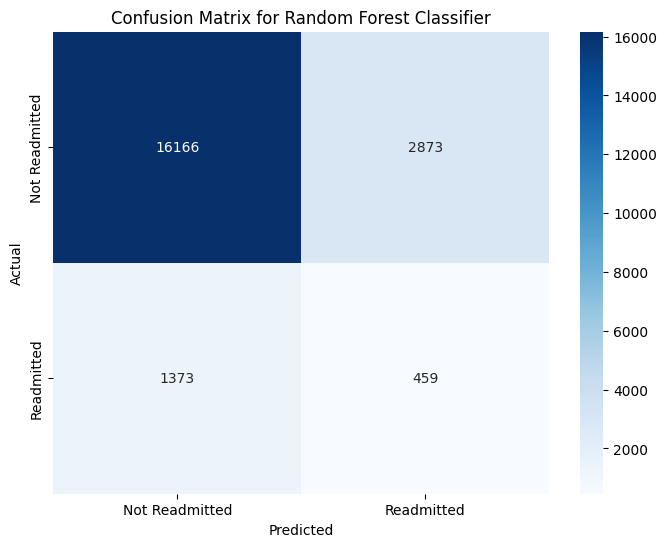

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib
#matplotlib.use('TkAgg')  # Use an interactive backend
#import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()




In [45]:
# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print the results
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 459
False Positive (FP): 2873
True Negative (TN): 16166
False Negative (FN): 1373


In [46]:
#Run model 2: XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [47]:
# Convert all column names to strings
X.columns = X.columns.astype(str)

# Replace invalid characters with underscores
X.columns = X.columns.str.replace(r"[\[\]<>,]", "_", regex=True)

# Ensure no invalid characters remain
print(X.columns)


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'admission_type_id_2',
       'admission_type_id_3',
       ...
       'diag_3_Infectious and Parasitic', 'diag_3_Injury and Poisoning',
       'diag_3_Musculoskeletal Disorders', 'diag_3_Neoplasms', 'diag_3_Other',
       'diag_3_Pregnancy Complications', 'diag_3_Respiratory System',
       'diag_3_Skin Diseases', 'diag_3_Symptoms and Ill Defined Conditions',
       'diag_3_Unknown'],
      dtype='object', length=166)


In [48]:
# Split the data into training and testing sets
# Train an XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Apply SMOTE to counter embalanced dependent variable
smote = SMOTE(random_state=42)

#train the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
xgb_model.fit(X_train_resampled, y_train_resampled)




c:\Users\merah\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print Results
print("XGBoost Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print("\nClassification Report:\n", classification_rep_xgb)


XGBoost Model Evaluation Metrics:
Accuracy: 0.9112644339035024
Precision: 0.40384615384615385
Recall: 0.02292576419213974
F1 Score: 0.04338842975206612

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     19039
           1       0.40      0.02      0.04      1832

    accuracy                           0.91     20871
   macro avg       0.66      0.51      0.50     20871
weighted avg       0.87      0.91      0.87     20871



In [50]:
print(y_train_resampled.value_counts())


readmitted
0    44379
1    44379
Name: count, dtype: int64


In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib

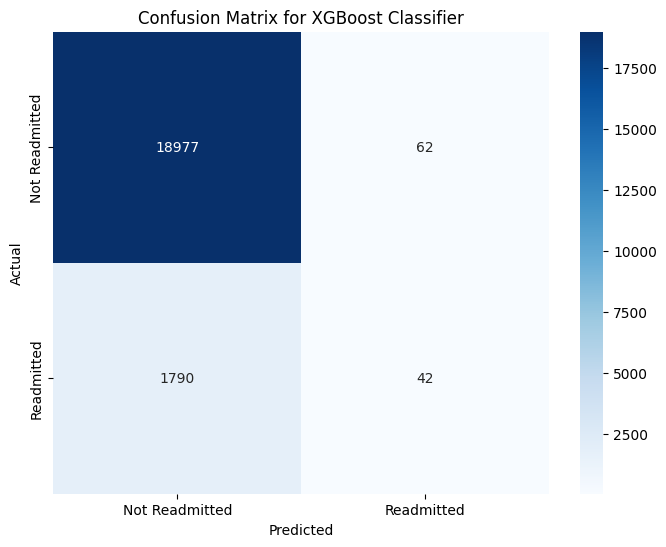

In [83]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


In [53]:
#Run model 3: logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [54]:

# Train Logistic Regression model
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

log_reg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)

# Print Results
print("Logistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print("\nClassification Report:\n", classification_rep_log_reg)


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9098749460974558
Precision: 0.304
Recall: 0.02074235807860262
F1 Score: 0.038834951456310676

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     19039
           1       0.30      0.02      0.04      1832

    accuracy                           0.91     20871
   macro avg       0.61      0.51      0.50     20871
weighted avg       0.86      0.91      0.87     20871



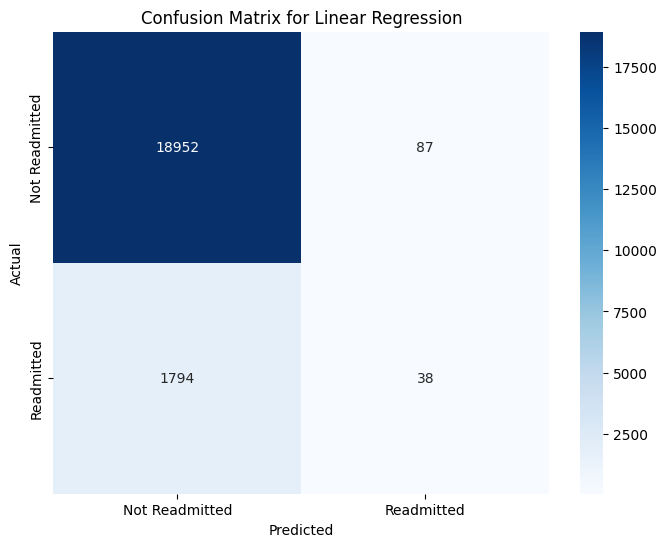

In [62]:
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'], yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Regression')
plt.show()


In [55]:
#run cross validation
from sklearn.model_selection import cross_val_score


In [64]:

# Perform cross-validation and evaluate each model
cv_results = {}


# Random Forest Cross-Validation
cv_results['Random Forest'] = cross_val_score(
    model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# XGBoost Cross-Validation
cv_results['XGBoost'] = cross_val_score(
    xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Logistic Regression Cross-Validation
cv_results['Logistic Regression'] = cross_val_score(
    log_reg_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_results = pd.DataFrame(summary)
print(cv_results)

c:\Users\merah\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\merah\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\merah\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [07:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

                 Model  Accuracy  Precision    Recall  F1 Score  \
0        Random Forest  0.796560   0.137755  0.250546  0.177769   
1              XGBoost  0.911264   0.403846  0.022926  0.043388   
2  Logistic Regression  0.909875   0.304000  0.020742  0.038835   

   Mean CV Accuracy  CV Standard Deviation  
0          0.911292               0.000004  
1          0.910080               0.000219  
2          0.658001               0.002691  


In [57]:

# Summary of Results
summary = {
    "Model": ["Random Forest", "XGBoost", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, model.predict(X_test)),
                 accuracy_score(y_test, xgb_model.predict(X_test)),
                 accuracy_score(y_test, log_reg_model.predict(X_test))],
    "Precision": [precision_score(y_test, model.predict(X_test)),
                  precision_score(y_test, xgb_model.predict(X_test)),
                  precision_score(y_test, log_reg_model.predict(X_test))],
    "Recall": [recall_score(y_test, model.predict(X_test)),
               recall_score(y_test, xgb_model.predict(X_test)),
               recall_score(y_test, log_reg_model.predict(X_test))],
    "F1 Score": [f1_score(y_test, model.predict(X_test)),
                 f1_score(y_test, xgb_model.predict(X_test)),
                 f1_score(y_test, log_reg_model.predict(X_test))],
    "Mean CV Accuracy": [cv_results['Random Forest'].mean(),
                         cv_results['XGBoost'].mean(),
                         cv_results['Logistic Regression'].mean()],
    "CV Standard Deviation": [cv_results['Random Forest'].std(),
                               cv_results['XGBoost'].std(),
                               cv_results['Logistic Regression'].std()]
}

# Create a DataFrame to summarize results
results_df = pd.DataFrame(summary)

# Display results
print("Model Comparison with Cross-Validation Results:")
print(results_df)


Model Comparison with Cross-Validation Results:
                 Model  Accuracy  Precision    Recall  F1 Score  \
0        Random Forest  0.796560   0.137755  0.250546  0.177769   
1              XGBoost  0.911264   0.403846  0.022926  0.043388   
2  Logistic Regression  0.909875   0.304000  0.020742  0.038835   

   Mean CV Accuracy  CV Standard Deviation  
0          0.911292               0.000004  
1          0.910080               0.000219  
2          0.658001               0.002691  


                           Feature  Importance
0                 time_in_hospital    0.097880
121      diag_1_Circulatory System    0.055132
16      discharge_disposition_id_3    0.052775
57                  race_Caucasian    0.046686
136      diag_2_Circulatory System    0.044550
..                             ...         ...
118  metformin-pioglitazone_Steady    0.000000
109            troglitazone_Steady    0.000000
108                    miglitol_Up    0.000000
116         glyburide-metformin_Up    0.000000
117     glipizide-metformin_Steady    0.000000

[166 rows x 2 columns]


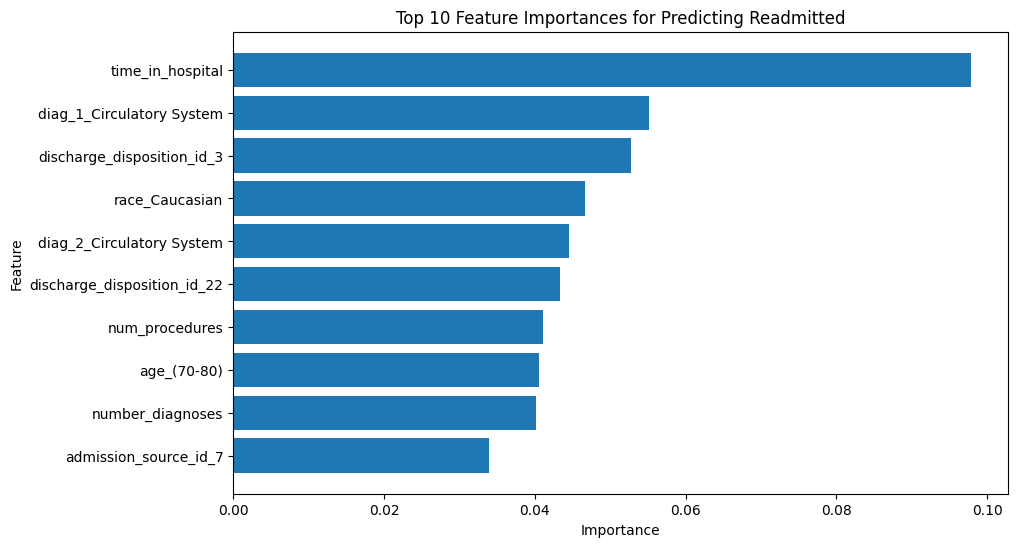

In [82]:
# Features of importance

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Filter the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Predicting Readmitted')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

